In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score

In [2]:
data =pd.read_csv('ecommerce_dataset_updated.csv')
data

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [4]:
data['Category'].value_counts()



Category
Home & Kitchen    549
Books             534
Clothing          531
Toys              523
Sports            520
Beauty            505
Electronics       498
Name: count, dtype: int64

In [5]:
data['Payment_Method'].value_counts()

Payment_Method
Credit Card         760
UPI                 757
Debit Card          731
Net Banking         716
Cash on Delivery    696
Name: count, dtype: int64

In [6]:
jumlah_produk = data['Product_ID'].nunique()
print("Jumlah Produk Unik:", jumlah_produk)

Jumlah Produk Unik: 3660


In [7]:
data.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


c:\Users\ASUS\OneDrive\Documents\python\Solution7\.conda\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24524\2041651084.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(6,3,i)
c:\Users\ASUS\OneDrive\Documents\python\Solution7\.conda\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24524\2041651084.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.

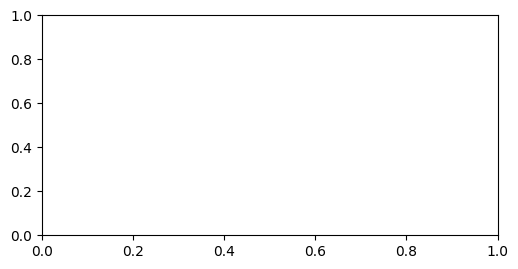

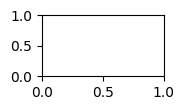

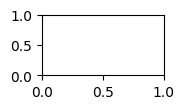

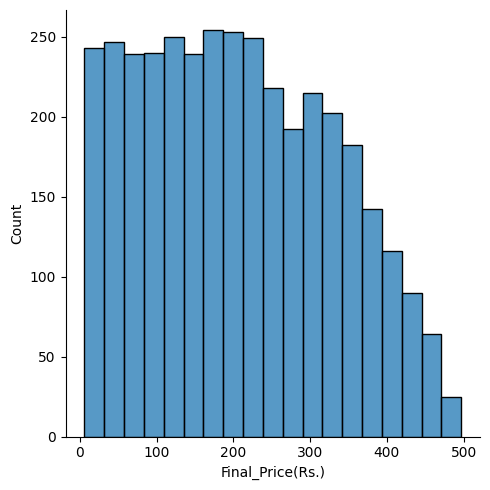

In [8]:
plt.figure(figsize=(20,20))

for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(6,3,i)
        sns.displot(data[col], kde_kws ={'bw': 0.1}, ax=ax)
        plt.xlabel(col)
        plt.tight_layout()

plt.show();

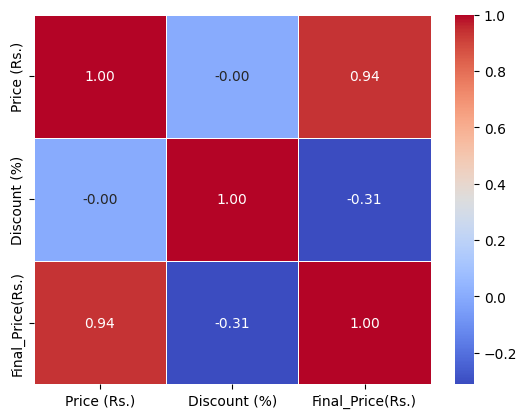

In [9]:
cor_matriks = data.select_dtypes(include=['number']).corr()
sns.heatmap(cor_matriks, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()


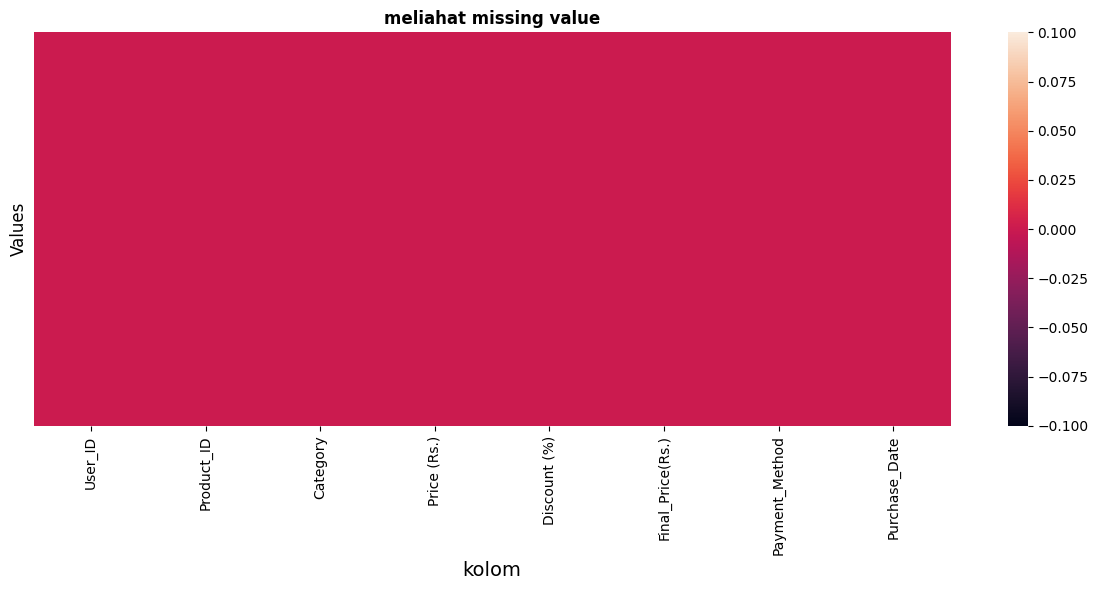

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), yticklabels=False)
plt.title('meliahat missing value', weight='bold')
plt.xlabel('kolom', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.tight_layout()

In [11]:
data.duplicated().sum()

0

In [12]:
df = data.drop(['User_ID', 'Product_ID', 'Purchase_Date'], axis=1)


In [13]:
df

,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method
0,Sports,36.53,15,31.05,Net Banking
1,Clothing,232.79,20,186.23,Net Banking
2,Sports,317.02,25,237.76,Credit Card
3,Toys,173.19,25,129.89,UPI
4,Beauty,244.80,20,195.84,Net Banking
...,...,...,...,...,...
3655,Beauty,486.79,0,486.79,UPI
3656,Toys,212.87,15,180.94,Cash on Delivery
3657,Home & Kitchen,389.76,0,389.76,Net Banking
3658,Electronics,447.66,30,313.36,UPI


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Data kategori dengan urutan yang diinginkan
category_order = ['Electronics', 'Beauty', 'Sports', 'Toys', 'Clothing', 'Books', 'Home & Kitchen']
payment_order = ['Cash on Delivery', 'Net Banking', 'Debit Card', 'UPI', 'Credit Card']

# Buat OrdinalEncoder dengan kategori yang sudah ditentukan
encoder = OrdinalEncoder(categories=[category_order, payment_order])

# Terapkan encoding ke kolom yang sesuai
df[['Category', 'Payment_Method']] = encoder.fit_transform(df[['Category', 'Payment_Method']])

# Pastikan hasilnya dalam bentuk integer
df[['Category', 'Payment_Method']] = df[['Category', 'Payment_Method']].astype(int)

# Cek hasil encoding
print(df.head())


   Category  Price (Rs.)  Discount (%)  Final_Price(Rs.)  Payment_Method
0         2        36.53            15             31.05               1
1         4       232.79            20            186.23               1
2         2       317.02            25            237.76               4
3         3       173.19            25            129.89               3
4         1       244.80            20            195.84               1


In [15]:
df

,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method
0,2,36.53,15,31.05,1
1,4,232.79,20,186.23,1
2,2,317.02,25,237.76,4
3,3,173.19,25,129.89,3
4,1,244.80,20,195.84,1
...,...,...,...,...,...
3655,1,486.79,0,486.79,3
3656,3,212.87,15,180.94,0
3657,6,389.76,0,389.76,1
3658,0,447.66,30,313.36,3


In [16]:
cols_to_convert = ['Price (Rs.)', 'Final_Price(Rs.)']
df[cols_to_convert] = df[cols_to_convert].astype(int)


In [17]:
scaler =  StandardScaler()
data_scaling = scaler.fit_transform(df)

In [18]:
df_scaled = pd.DataFrame(data_scaling)
df_scaled.columns = df.columns
df_scaled

,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method
0,-0.530753,-1.540965,-0.259695,-1.429945,-0.741319
1,0.470049,-0.157395,0.079764,-0.166370,-0.741319
2,-0.530753,0.442622,0.419222,0.249387,1.384479
3,-0.030352,-0.573878,0.419222,-0.631039,0.675880
4,-1.031155,-0.072687,0.079764,-0.093001,-0.741319
...,...,...,...,...,...
3655,-1.031155,1.635599,-1.278072,2.279261,0.675880
3656,-0.030352,-0.298576,-0.259695,-0.215282,-1.449918
3657,1.470851,0.950873,-1.278072,1.488507,-0.741319
3658,-1.531556,1.360296,0.758681,0.868947,0.675880


In [19]:
pca  =PCA(random_state=45)
pca.fit(df_scaled)

PCA(random_state=45)

In [20]:
pca.explained_variance_

array([1.98806616, 1.01388619, 1.00234206, 0.98221712, 0.01485497])

In [21]:
pca.explained_variance_ratio_*100

array([39.7504594 , 20.27218345, 20.0413639 , 19.63897509,  0.29701817])

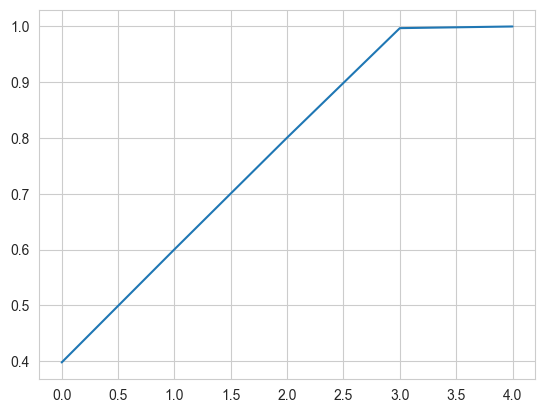

In [22]:
sns.set_style('whitegrid')
plt.plot(pca.explained_variance_ratio_.cumsum());

In [23]:
pca.n_components_

5

<BarContainer object of 5 artists>

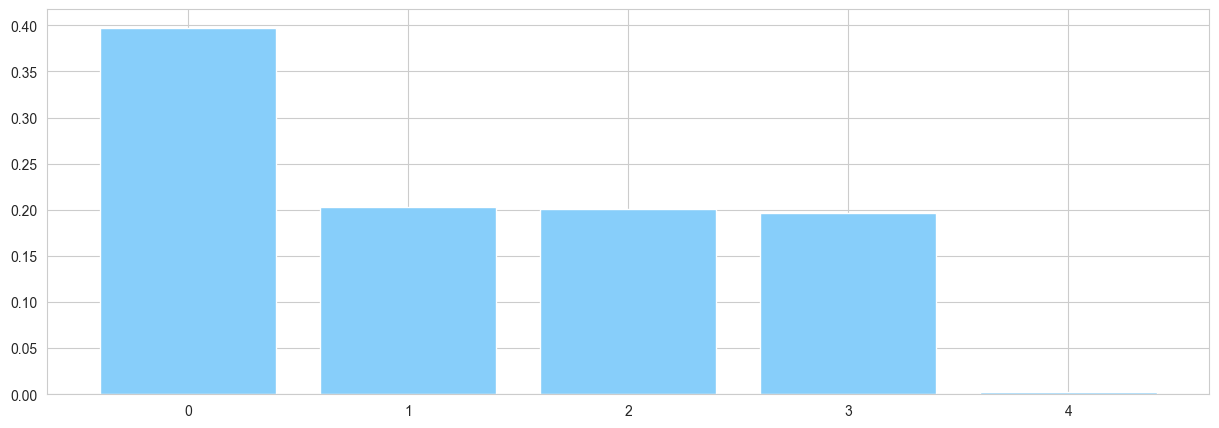

In [24]:
fitur = range(pca.n_components_)
plt.figure(figsize=(15,5))
plt.bar(fitur[:5],pca.explained_variance_ratio_[:5], color ='lightskyblue')

In [25]:
pca.explained_variance_ratio_[:4].sum()

0.9970298183418578

In [46]:
pca  =PCA(n_components=3,random_state=45)
X = pca.fit_transform(df_scaled)

In [47]:
X

array([[-1.97667691, -0.02410386, -0.84821299],
       [-0.22684022,  0.5976007 ,  0.21484143],
       [ 0.35402736, -0.66838749,  0.02105348],
       ...,
       [ 1.9969564 ,  0.03114412,  0.99606714],
       [ 1.33640498,  0.13889955, -1.03383527],
       [-0.50314727,  0.16115647,  1.69878309]])

In [48]:
kmeans = [KMeans(n_clusters= k,random_state=45).fit(X) for k in range(2,10)]
kmeans

c:\Users\ASUS\OneDrive\Documents\python\Solution7\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\OneDrive\Documents\python\Solution7\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\OneDrive\Documents\python\Solution7\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\OneDrive\Documents\python\Solution7\.conda\lib\site-packages\skle

[KMeans(n_clusters=2, random_state=45),
 KMeans(n_clusters=3, random_state=45),
 KMeans(n_clusters=4, random_state=45),
 KMeans(n_clusters=5, random_state=45),
 KMeans(n_clusters=6, random_state=45),
 KMeans(n_clusters=7, random_state=45),
 KMeans(random_state=45),
 KMeans(n_clusters=9, random_state=45)]

In [49]:
kmeans[0].inertia_


9353.39557351856

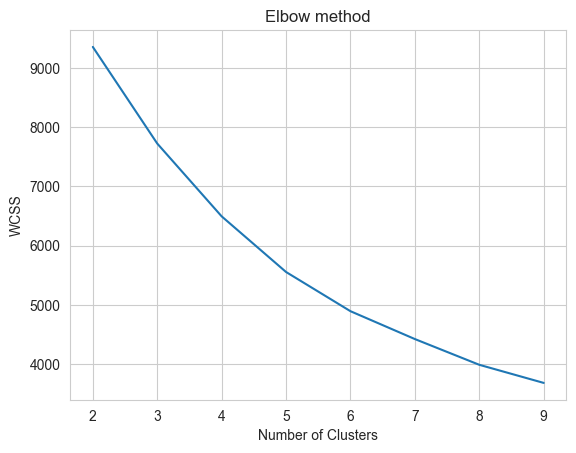

In [50]:
inertia= [model.inertia_ for model in kmeans]
plt.plot(range(2,10), inertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

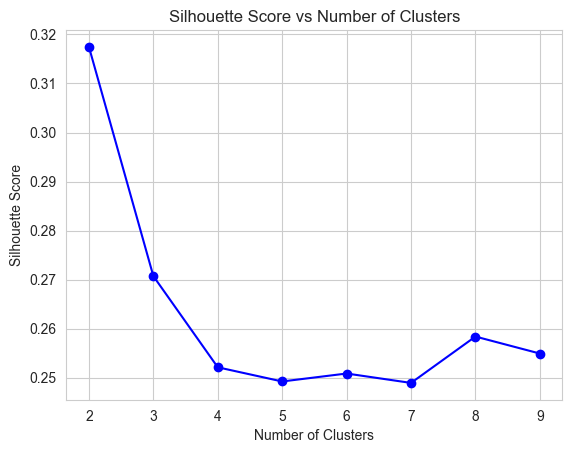

In [51]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores = [silhouette_score(X, model.labels_) for model in kmeans]  # ⬅️ Gunakan nama lain

plt.plot(range(2, 10), sil_scores, 'bo-')
plt.xticks(range(2,10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()


In [52]:
sil_scores

[0.3174572583345962,
 0.2707171044363931,
 0.25212556664334257,
 0.24923404693909954,
 0.25085683096530376,
 0.2489388574904081,
 0.2583947146223689,
 0.25493076560843936]

In [56]:
KMEANS = KMeans(n_clusters=3,random_state=45)
KMEANS.fit(X)
klaster = KMEANS.labels_

klaster[0:100]

c:\Users\ASUS\OneDrive\Documents\python\Solution7\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1])

In [57]:
pca_df = pd.DataFrame(data=X,columns=['pc0','pc1','pc2'])
pca_df['labels'] = klaster
pca_df.head()

,pc0,pc1,pc2,labels
0,-1.976677,-0.024104,-0.848213,1
1,-0.226840,0.597601,0.214841,0
2,0.354027,-0.668387,0.021053,2
3,-0.935905,-0.321253,0.216878,1
4,-0.126482,0.449150,-1.186195,0


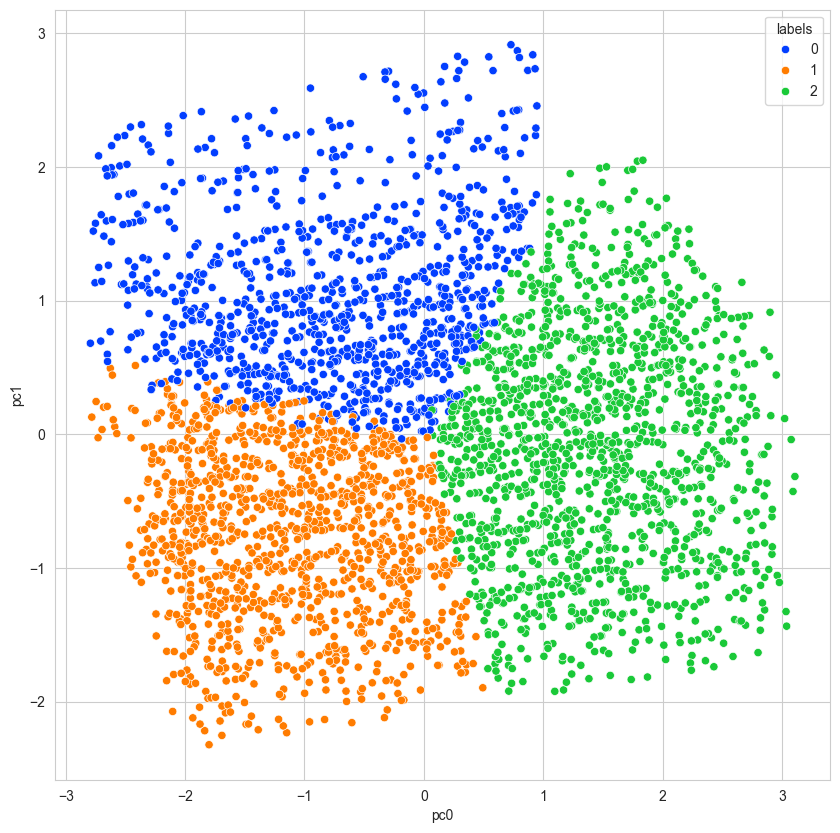

In [58]:
# Visualisasi Cluster-0 (biru) dan Cluster-1 (orange)
plt.figure(figsize=(10,10))
sns.scatterplot(x='pc0', y='pc1', hue='labels', data=pca_df, palette='bright');

In [36]:
data['klaster'] = klaster
data

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,klaster
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024,0
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024,0
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024,1
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024,0
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024,0
...,...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024,1
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024,0
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024,1
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024,1


In [37]:
data['klaster'].value_counts()

klaster
1    1528
0    1490
2     642
Name: count, dtype: int64

In [38]:
claster_0 = data[data['klaster'] == 0]
claster_0


,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,klaster
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024,0
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024,0
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024,0
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024,0
6,12772337,d41e0b55-c,Toys,76.91,5,73.06,Credit Card,28-03-2024,0
...,...,...,...,...,...,...,...,...,...
3637,7764e9c8,d3e39266-3,Electronics,193.43,15,164.42,Cash on Delivery,21-11-2024,0
3645,c94b1a1a,31706191-8,Beauty,98.73,5,93.79,Credit Card,15-11-2024,0
3651,4e69c8b2,8e123634-6,Toys,230.00,25,172.50,Credit Card,04-04-2024,0
3652,59b1a413,6a59db47-e,Books,218.44,25,163.83,UPI,19-03-2024,0


In [39]:
claster_1= data[data['klaster'] == 1]
claster_1

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,klaster
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024,1
8,7a8559d8,87c9c896-1,Sports,379.81,5,360.82,Credit Card,26-02-2024,1
11,3b857e65,e221cf14-c,Beauty,393.77,15,334.70,Cash on Delivery,10-09-2024,1
12,204fab33,8c9a5f54-b,Home & Kitchen,287.69,10,258.92,Credit Card,08-03-2024,1
14,8c1f2f98,38aec303-2,Clothing,305.10,25,228.83,UPI,20-06-2024,1
...,...,...,...,...,...,...,...,...,...
3653,860101ea,68867ed9-3,Books,431.85,15,367.07,Net Banking,14-08-2024,1
3654,fcdfd494,5420918c-0,Books,334.79,25,251.09,UPI,02-03-2024,1
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024,1
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024,1


In [40]:
claster_2= data[data['klaster'] == 2]
claster_2

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,klaster
5,3fdcdae8,0816ee12-5,Books,241.86,50,120.93,UPI,08-08-2024,2
9,8911f0d1,31308875-b,Home & Kitchen,415.36,50,207.68,Net Banking,11-01-2024,2
13,88159234,eeb0635d-a,Sports,26.26,50,13.13,Credit Card,10-05-2024,2
27,928bddf9,b338a0b6-7,Beauty,235.13,25,176.35,UPI,06-08-2024,2
28,0f32a6f6,df52cac6-d,Electronics,352.95,50,176.47,UPI,05-08-2024,2
...,...,...,...,...,...,...,...,...,...
3642,d5d8192a,954b6084-d,Sports,135.71,50,67.86,Debit Card,08-07-2024,2
3646,ae262d85,f0f93bcd-c,Home & Kitchen,79.42,50,39.71,Credit Card,11-06-2024,2
3647,e9ad7995,a41c5d52-d,Home & Kitchen,248.01,50,124.00,Cash on Delivery,03-02-2024,2
3648,efcf43d8,240cbb3f-2,Electronics,339.17,30,237.42,UPI,11-06-2024,2
